In [27]:
import pandas as pd
import numpy as np
import string
import re
import nltk
import sklearn

In [29]:
df = pd.read_csv(r'C:\Users\ANURAG DHAWAN\Desktop\PROJECT\Datasets\amazon_reviews.csv')
df.tail()

,Unnamed: 0,Customer Name,Title,Rating,Review
5065,185,Gurdeep Singh,Perfect,3.0 out of 5 stars,Perfect fitting
5066,186,M k Mahindru,Nothing great,3.0 out of 5 stars,Just ok for the price. Nothing great
5067,187,mohit mishra,Average clothing material!!,3.0 out of 5 stars,Clothing material is average
5068,188,Swagatpatil,Ok ok,3.0 out of 5 stars,Ok ok
5069,189,Siddhartha Basak,Ok,3.0 out of 5 stars,It's ok not good


In [30]:
df = df.drop(['Unnamed: 0','Customer Name','Title'],axis=1)
pd.set_option('display.max_colwidth',100)

nltk.download('stopwords')
df.head()

[nltk_data] Downloading package stopwords to C:\Users\ANURAG
[nltk_data]     DHAWAN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Rating,Review
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...


In [31]:
def data_clean(text):
    translator= str.maketrans(string.punctuation, ' '*len(string.punctuation))
    text = text.translate(translator)
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  
                           u"\U0001F300-\U0001F5FF"  
                           u"\U0001F680-\U0001F6FF"  
                           u"\U0001F1E0-\U0001F1FF"  
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(r'', text)
    text = text.strip()
    tokens = re.split("\W+",text)
    stopwords = nltk.corpus.stopwords.words('english')
    text = [word for word in tokens if word not in stopwords]
    return text

In [32]:
df['clean_review']= df['Review'].apply(lambda x: data_clean(x.lower()))
df.head()

,Rating,Review,clean_review
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...,"[brilliant, uploaded, pics, selfie, well, portrait, shot, near, shot, loved, phone, good, sensor..."
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...,"[used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate, sp..."
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...,"[average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, disa..."
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...,"[display, green, tint, issue, display, looks, like, cheap, quality, phone, want, return, phone, ..."
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...,"[oneplus, nord, competitive, smartphone, segment, pros, device, pretty, impressive, looks, premi..."


In [33]:
wn = nltk.WordNetLemmatizer()
def lemmatization(tokens):
    text = [wn.lemmatize(word) for word in tokens]
    return ' '.join(word for word in text)

df['lemmatized'] = df['clean_review'].apply(lambda x: lemmatization(x))
df.head()

,Rating,Review,clean_review,lemmatized
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...,"[brilliant, uploaded, pics, selfie, well, portrait, shot, near, shot, loved, phone, good, sensor...",brilliant uploaded pic selfie well portrait shot near shot loved phone good sensor first phone j...
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...,"[used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate, sp...",used several phone except like type phone phone silky smoothy 90hz refresh rate speed good smoot...
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...,"[average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, disa...",average phone one plus surprisingly bad battery life though good battery paper disappointed
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...,"[display, green, tint, issue, display, looks, like, cheap, quality, phone, want, return, phone, ...",display green tint issue display look like cheap quality phone want return phone amazon offering...
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...,"[oneplus, nord, competitive, smartphone, segment, pros, device, pretty, impressive, looks, premi...",oneplus nord competitive smartphone segment pro device pretty impressive look premium 1 screen l...


In [34]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

In [35]:
def feedback(text):
    if(int(text[0])>3):
        return 3
    if(int(text[0])<3):
        return 1
    else:
        return 2
df['feedback'] = df['Rating'].apply(lambda x : feedback(x))    
df.head()

,Rating,Review,clean_review,lemmatized,feedback
0,5.0 out of 5 stars,Brilliant..I have uploaded some pics of selfie as well as Portrait shot of near by shot.What i...,"[brilliant, uploaded, pics, selfie, well, portrait, shot, near, shot, loved, phone, good, sensor...",brilliant uploaded pic selfie well portrait shot near shot loved phone good sensor first phone j...,3
1,4.0 out of 5 stars,I used several phone except like this type of phone but this phone is very silky smoothy.90hz ...,"[used, several, phone, except, like, type, phone, phone, silky, smoothy, 90hz, refresh, rate, sp...",used several phone except like type phone phone silky smoothy 90hz refresh rate speed good smoot...,3
2,2.0 out of 5 stars,Average phone from one plus but surprisingly very bad battery life though good battery on pape...,"[average, phone, one, plus, surprisingly, bad, battery, life, though, good, battery, paper, disa...",average phone one plus surprisingly bad battery life though good battery paper disappointed,1
3,1.0 out of 5 stars,Display has green tint issue..display looks like a very cheap quality phone. Want to return th...,"[display, green, tint, issue, display, looks, like, cheap, quality, phone, want, return, phone, ...",display green tint issue display look like cheap quality phone want return phone amazon offering...,1
4,3.0 out of 5 stars,OnePlus Nord is a very competitive smartphone in this segment.Pros.Device is pretty impressive...,"[oneplus, nord, competitive, smartphone, segment, pros, device, pretty, impressive, looks, premi...",oneplus nord competitive smartphone segment pro device pretty impressive look premium 1 screen l...,2


3-->positive ; 2-->neutral ; 1-->negative

In [36]:
x = df.lemmatized
y=df.feedback
print(x.shape)
print(y.shape)

(5070,)
(5070,)


In [37]:
Y = pd.get_dummies(df['feedback']).values
print( Y.shape)

(5070, 3)


In [38]:
corpus=[]
for sentence in x:
    corpus.append(sentence)

type(corpus)

list

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(corpus, Y, test_size=0.10, random_state=42 , stratify = Y)

In [40]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words=15000, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True ,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(X_train)
training_padded = pad_sequences(training_sequences, maxlen=200)

testing_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(testing_sequences, maxlen=200)


voc_size = 50000
onehot_repr=[one_hot(words,voc_size)for words in corpus] 
onehot_repr

voc_size = 50000
sent_length=200
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

In [41]:
voc_size = 50000
sent_length=200
embedding_vector_features=100
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(LSTM(100))
model.add(Dense(3,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 200, 100)          5000000   
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 303       
Total params: 5,080,703
Trainable params: 5,080,703
Non-trainable params: 0
_________________________________________________________________
None


X_final=np.array(embedded_docs)
y_final=np.array(Y)

print(X_final.shape)
print(Y)

In [42]:
model.fit(training_padded,y_train,epochs=5, validation_data=(testing_padded, y_test) ,batch_size=64)

Epoch 1/5
72/72 [==============================] - 19s 265ms/step - loss: 0.8536 - accuracy: 0.6410 - val_loss: 0.6912 - val_accuracy: 0.7318
Epoch 2/5
72/72 [==============================] - 19s 269ms/step - loss: 0.5903 - accuracy: 0.7712 - val_loss: 0.6024 - val_accuracy: 0.7574
Epoch 3/5
72/72 [==============================] - 20s 282ms/step - loss: 0.4403 - accuracy: 0.8234 - val_loss: 0.6496 - val_accuracy: 0.7495
Epoch 4/5
72/72 [==============================] - 21s 286ms/step - loss: 0.3329 - accuracy: 0.8762 - val_loss: 0.7269 - val_accuracy: 0.7436
Epoch 5/5
72/72 [==============================] - 22s 299ms/step - loss: 0.2607 - accuracy: 0.9112 - val_loss: 0.8530 - val_accuracy: 0.7278


df['feedback'].value_counts()

accr = model.evaluate(X_test,y_test)

In [57]:
new_complaint = ['While Alexa is smart and intelligent , it cannot answer complex questions because it does not have Google Search ! Google mini has the brains of the best search engine on earth ! Google mini any day ! Only reason to buy it would be if you had a prime music account and you had to play music through it !']
seq = tokenizer.texts_to_sequences(new_complaint)
#onehot_repr=[one_hot(words,voc_size)for words in new_complaint ] 
padded = pad_sequences(seq, maxlen=200)
pred = model.predict(padded)
labels = ['1','2','3']
print(pred, labels[np.argmax(pred)])

[[0.1541604  0.82776004 0.0180795 ]] 2


In [36]:
Y[:5]

array([[0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0]], dtype=uint8)

In [50]:
y_pred = model.predict(X_test)
y_pred = y_pred

In [52]:
y_pred[:5]

array([[3.8063002e-04, 3.3043923e-03, 9.9631494e-01],
       [1.4203001e-03, 8.2844673e-03, 9.9029529e-01],
       [4.4779194e-05, 4.7365340e-04, 9.9948162e-01],
       [9.9503148e-01, 4.5174556e-03, 4.5111313e-04],
       [3.2934359e-01, 6.2655056e-01, 4.4105794e-02]], dtype=float32)

In [53]:
y_test[:5]

array([[0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [48]:
import matplotlib as plt

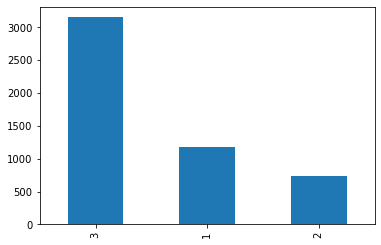

In [49]:
bar = y.value_counts()
bar.plot(kind='bar')